<a href="https://colab.research.google.com/github/edco29/detectorPets/blob/master/Perro_o_Gato_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget "https://drive.google.com/uc?id=1r-080x3lm1vwpjygG8aOEgYR483twagi" -O modelo_perro_gato.h5

--2020-05-08 21:53:33--  https://drive.google.com/uc?id=1r-080x3lm1vwpjygG8aOEgYR483twagi
Resolving drive.google.com (drive.google.com)... 172.217.214.138, 172.217.214.100, 172.217.214.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.214.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eucp9l1dnl4vuhdiovb014ne8glmdnd4/1588974750000/08440291612396137855/*/1r-080x3lm1vwpjygG8aOEgYR483twagi [following]
--2020-05-08 21:53:35--  https://doc-0k-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eucp9l1dnl4vuhdiovb014ne8glmdnd4/1588974750000/08440291612396137855/*/1r-080x3lm1vwpjygG8aOEgYR483twagi
Resolving doc-0k-10-docs.googleusercontent.com (doc-0k-10-docs.googleusercontent.com)... 108.177.112.132, 2607:f8b0:4001:c12::84
Connecting to doc-0k-10-docs.googleusercontent.com (doc-0k-10-docs.googleusercontent.com)|1

In [4]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [6]:
new_model = tf.keras.models.load_model('modelo_perro_gato.h5')

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
#tf.keras.utils.plot_model(model)

In [0]:
def prepara_imagen( path ):
    IMAGE_WIDTH = IMAGE_HEIGHT = 150
    img = Image.open(path)
    print(img.size)
    # Ajustamos la imagen al tamaño de model.input
    img_resized = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
    img_resized
    plt.imshow(img_resized)
    x = np.asarray(img_resized, np.float32)
    #preprocessing
    x = x/255.
    x = x[None]
    print(x.shape)
    return x

(314, 161)
(1, 150, 150, 3)


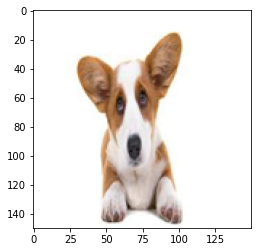

In [11]:
entrada_cnn = prepara_imagen('descarga.jpg')

In [12]:
y = new_model.predict(entrada_cnn)

if np.round(y) == 0:
    print("Gato reconocido")
else:
    print("Perro reconocido")

Perro reconocido
